In [ ]:
!pip install matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sentiment Analysis에 필요한 패키지 Import 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt --qq -y install fonts-NanumBarunGothic

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# 그래프에 retina display 적용

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  
fm._rebuild()

E: Command line option --qq is not understood in combination with the other options


구글 드라이브와 Colab을 연동합니다.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

# 구글드라이브 마운트 

Mounted at /content/gdrive/


In [ ]:
os.listdir('gdrive/My Drive/pytest')
# 지정된 경로에 파일을 출력 

['Sentiment Analysis Dataset.csv',
 'iris.csv',
 'test.csv',
 'ratings_morphed.txt',
 '김소월시.txt',
 '윤동주시.txt',
 'ratings.txt',
 'wiki_test.txt',
 'negative.txt',
 'positive.txt',
 'ratings_small.txt',
 'kor-eng',
 '네이버뉴스-생활문화_다중',
 'word2vec',
 'aclImdb_v1_small',
 'similarity',
 'fra-eng',
 'rathings_morphed.txt',
 'rathings.txt',
 'stopwords-ko.txt',
 '크롤링 20000개.csv',
 '학대별 라벨.xlsx',
 'bert',
 '위험별 척도 유형 200개씩.xlsx',
 'Child_Abuser.csv',
 '위험 척도 유형별 (1000개) .csv',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx',
 '위험 척도 유형 (해당없음 제거) .gsheet',
 '학대별 라벨_500개씩.csv',
 '학대유형척도.xlsx',
 'real_학대유형척도 (1).xlsx',
 'real_학대유형척도.xlsx',
 'Child_Abuser_score.csv',
 'Replace_Child.csv',
 '학대심각성 및 지속성_6분류_최종.xlsx',
 '학대심각성 및 지속성_6분류_최종1.xlsx',
 '학대심각성 및 지속성_6분류3.xlsx',
 'Novel_Author_Classification',
 '실데이터.xlsx']

In [ ]:
df = pd.read_excel('gdrive/My Drive/pytest/학대심각성 및 지속성_6분류3.xlsx')
# 지정된 구글드라이브의 파일을 불러오기 

In [ ]:
df.isnull().sum()

번호       0
내용       0
Label    0
dtype: int64

In [ ]:
df = df.drop(['번호'], axis = 1)

In [ ]:
df = df.loc[df['Label'] <= 4 ]

In [ ]:
df

,내용,Label
0,친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다....,1
1,전 중학생이고 친아빠 가정폭력 신고로 신고하고싶어요참을대로 참았고 아빠는 술먹으면 ...,1
2,저는 중 3 여학생입니다.제가 처음 맞은 건...4살때였어요.말버릇을 고치라고 아...,1
3,. 저는 9살 남학생입니다. 저희 아빠가 술을 먹고 온몸에 멍이 들 정도로 때리시...,1
4,가정폭력 저는 엄마 없이 아빠랑 사는 동생2명 저 3명 이랑 사는데 아빠...,1
...,...,...
1815,지난달 경남 창녕에서는 9살 여자아이가 계부와 친모의 학대에서 도망치기 위...,2
1816,5살 의붓아들의 손과 발을 묶고 둔기로 폭행해 숨지게 한 혐의를 받는 계부...,2
1817,아동학대 이미지. [중앙포토] 세 남매 중 2명을 숨지게 하...,2
1818,[연합뉴스TV] 아무도 없는 집에 어린 남매만 남겨두고 엿새...,2


In [ ]:
df.value_counts()

내용                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
df.columns

Index(['내용', 'Label'], dtype='object')

In [ ]:
df['Label'].unique()
# 반응변수들의 고유한 범위를 파악 

array([1, 2, 3, 4])

In [ ]:
df['Label'].value_counts()
# 이거 논문에 개수 적기 

3    303
2    303
1    302
4    300
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


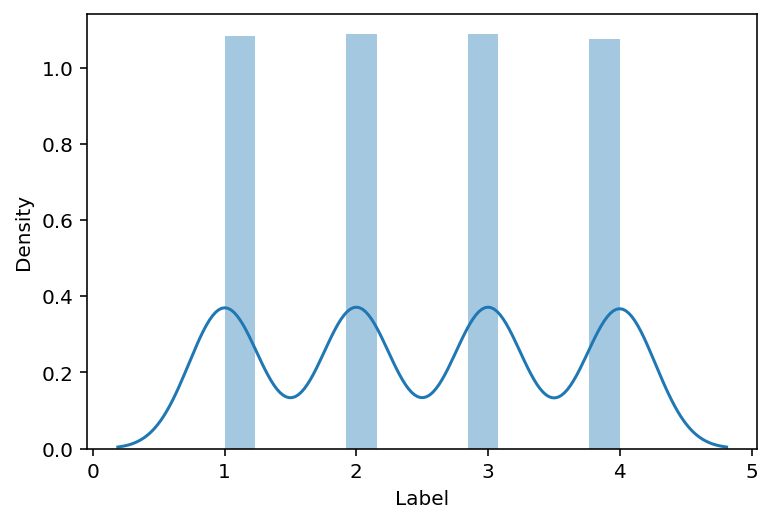

In [ ]:
import seaborn as sns
sns.distplot(df.Label)

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [ ]:
import konlpy
konlpy.tag.Mecab().morphs('아버지가방에들어가신다')

['아버지', '가', '방', '에', '들어가', '신다']

In [ ]:
list1 = df.values.tolist()
# 불러왔던 df를 list형태로 변환해주며 list1이라는 객체에 저장 

In [ ]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
        
    return doc

# 함수지정 
# 분석하고자 하는 텍스트에서 한글만을 추출 

In [ ]:
def text_tokenizing(doc):
  return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

In [ ]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [ ]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

# 함수지정 
# 불용어사전을 만들어주는 함수(for문을 통해 set형태로 하나씩 넣어줌)

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')
# 지정한 함수를 활용하여 구글드라이브에 불용어를 넣어놓은 텍스트파일을 불러옴 

In [ ]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk

# # JDK Install 

In [ ]:
# !pip install JPype1==0.7.4
# !pip install rhinoMorph
# # JPype Install 
# # 형태소 분석기 Rhino 사용 

In [ ]:
# import rhinoMorph
# rn = rhinoMorph.startRhino()
# # 설치된 Rhino를 임포트하고 시작하는 명어 

In [ ]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [ ]:
a = []
for i in SW:
  a.append(i.replace("\n",""))
# 지정된 불용어사전이 \n이 추가되어 있기때문에 없애주는 작업 

In [ ]:
b = ['습니다', '는데', '어요', '으로', '에서', '한테', '라고', '다고', '면서', '까지', '해서', '합니다', '입니다', '어서', '세요', '으면', '구요']
for i in b:
  a.append(i)

In [ ]:
a

['어떤것들',
 '해도된다',
 '이르기까지',
 '와르르',
 '허',
 '사',
 '것들',
 '로써',
 '한 후',
 '하지만',
 '이 정도의',
 '이상',
 '하든지',
 '만 못하다하기보다는',
 '바꾸어말하자면',
 '으로 인하여',
 '거바',
 '시초에',
 '할줄알다',
 '셋',
 '이천팔',
 '해서는 안된다',
 '그러니까',
 '하자마자',
 '할지언정',
 '줄은모른다',
 '그래',
 '에 있다',
 '그러면',
 '양자',
 '그러므로',
 '나',
 '너무',
 '차라리',
 '인 듯하다',
 '어느것',
 '여러분',
 '이천육',
 '여섯',
 '하구나',
 '일때',
 '상대적으로 말하자면',
 '왜냐하면',
 '반대로 말하자면',
 '그래도',
 '하도다',
 '쉿',
 '응당',
 '붕붕',
 '저것만큼',
 '부류의 사람들',
 '주룩주룩',
 '다수',
 '하지 않는다면',
 'ㅠ',
 '이때',
 '고로',
 '한 이유는',
 '까악',
 '흐흐',
 '얼마만큼',
 '결론을 낼 수 있다',
 '옆사람',
 '아울러',
 '연관되다',
 '이렇게되면',
 '둥둥',
 '그러니',
 '생각한대로',
 '어느 년도',
 '관련이 있다',
 '반대로',
 '일곱',
 '을',
 '매번',
 '어떻게',
 '여기',
 '그들',
 '잇따라',
 '해요',
 '어떻해',
 '그것',
 '더불어',
 '요만한걸',
 '여부',
 '어디',
 '그럼',
 '때문에',
 '그렇지만',
 '예를 들면',
 '자기집',
 '한데',
 '와',
 '지만',
 '어느',
 '할 따름이다',
 '조차도',
 '팔',
 '할뿐',
 '더라도',
 '주저하지 않고',
 '동시에',
 '즉시',
 '개의치않고',
 '때가 되어',
 '했어요',
 '너희',
 '견지에서',
 '오',
 '의해서',
 '그렇지 않다면',
 '하여야',
 '시각',
 '설사',
 '이유만으로',
 '휴',
 '중의하나',
 '이봐',
 '기대여',
 '근거하

In [ ]:
a

['어떤것들',
 '해도된다',
 '이르기까지',
 '와르르',
 '허',
 '사',
 '것들',
 '로써',
 '한 후',
 '하지만',
 '이 정도의',
 '이상',
 '하든지',
 '만 못하다하기보다는',
 '바꾸어말하자면',
 '으로 인하여',
 '거바',
 '시초에',
 '할줄알다',
 '셋',
 '이천팔',
 '해서는 안된다',
 '그러니까',
 '하자마자',
 '할지언정',
 '줄은모른다',
 '그래',
 '에 있다',
 '그러면',
 '양자',
 '그러므로',
 '나',
 '너무',
 '차라리',
 '인 듯하다',
 '어느것',
 '여러분',
 '이천육',
 '여섯',
 '하구나',
 '일때',
 '상대적으로 말하자면',
 '왜냐하면',
 '반대로 말하자면',
 '그래도',
 '하도다',
 '쉿',
 '응당',
 '붕붕',
 '저것만큼',
 '부류의 사람들',
 '주룩주룩',
 '다수',
 '하지 않는다면',
 'ㅠ',
 '이때',
 '고로',
 '한 이유는',
 '까악',
 '흐흐',
 '얼마만큼',
 '결론을 낼 수 있다',
 '옆사람',
 '아울러',
 '연관되다',
 '이렇게되면',
 '둥둥',
 '그러니',
 '생각한대로',
 '어느 년도',
 '관련이 있다',
 '반대로',
 '일곱',
 '을',
 '매번',
 '어떻게',
 '여기',
 '그들',
 '잇따라',
 '해요',
 '어떻해',
 '그것',
 '더불어',
 '요만한걸',
 '여부',
 '어디',
 '그럼',
 '때문에',
 '그렇지만',
 '예를 들면',
 '자기집',
 '한데',
 '와',
 '지만',
 '어느',
 '할 따름이다',
 '조차도',
 '팔',
 '할뿐',
 '더라도',
 '주저하지 않고',
 '동시에',
 '즉시',
 '개의치않고',
 '때가 되어',
 '했어요',
 '너희',
 '견지에서',
 '오',
 '의해서',
 '그렇지 않다면',
 '하여야',
 '시각',
 '설사',
 '이유만으로',
 '휴',
 '중의하나',
 '이봐',
 '기대여',
 '근거하

In [ ]:
SW = set(a)

In [ ]:
SW

{'',
 'ㅋ',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅎ',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅠ',
 'ㅠㅠ',
 'ㅠㅠㅠ',
 'ㅡ',
 'ㅡㅡ',
 'ㅡㅡㅡ',
 '가',
 '가까스로',
 '가령',
 '가지',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구요',
 '구체적으로',
 '그',
 '그것',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리',
 '그리고',
 '그리하',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '근데',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '나오',
 '남들',
 '남짓',
 '내공',
 '너',
 '너무',
 '너희',
 '너희들',
 '네',
 '넷',
 '논하지 않다',
 '누가 알겠는가',
 '누구',
 '는데',
 '다고',
 '다니',
 '다른',
 '다른 방면으로',
 '다만

In [ ]:
list1

[['친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다. 어머니는 협의이혼을 생각 중이신데 미성년자인 동생이 있어서 3개월 간 숙려기간을 가져야 한다고 알고 있습니다.1) 협의이혼 시 3개월의 숙려기간 동안 친부와 따로 살도록 할 수 있나요? 가정폭력에 대한 증거가 고막천공으로 치료받았다는 진단서밖에 없는데 신고를 해서 접근금지 처분을 내릴 수 있나요?2) 만약 친부가 이혼에 반대하면 진단서로 가정폭력했다는 사실을 증명해서 이혼소송을 걸 수 있나요?3) 향후 미성년자인 동생의 양육권 분쟁에서 제가 당한 가정폭력을 근거로 친모가 양육권을 가져갈 수 있도록 할 수 있나요?',
  1],
 ['전 중학생이고 친아빠 가정폭력 신고로 신고하고싶어요참을대로 참았고 아빠는 술먹으면 제 물건을 집어던지면서 욕하고 폭력 휘두르시고저번에는 저한테 그릇을 던지고 욕하고 다 치우라고 했어요 얼마전에는 숟가락을 던지고 욕하고 오늘은 왜 라고 말하고 눈이 자기 마음에 안든다고 숟가락을 던지고 제 머리채를 잡고 제 귀를 때렸어요 계속 때릴라하는거는 엄마가 막아서 덜 맞았어요 엄마가 그만하라하면 아빠는 오히려 더 화내고 욕을 해요 이혼 얘기도 나오고 집을 안나가면 집을 불태워버린다하고 이혼하고 지금 살고있는 집도 팔거고 카드도 다 달라하고 재산도 반으로 분할 한다고 말했어요 엄마랑 얘기하다가 너무 서러워서 심하게 울었는데 욕을 섞어서 시끄럽다고 한 번만 더 울면 진짜 머리채잡고 쫓아낼거라고 나가 뒤져 나가 뒤져를 계속 반복했어요 이혼할거라고 난리 피우면서 이거 다 너 때문이야 라고 계속 죄책감 주고요 이혼 하면 돈도 없고 집도 없고 학원도 못다녀요 엄마도 힘들고요 사과 안할라했는데 엄마가 너무 힘들어보여서 어쩔수없이 상황설명 까지하고 오해 풀고 잘지내볼라했어요 아빠랑 말은 당연히 안통했고요 풀려는 부분도 응응 내가 잘못했어 거리면서 넘기다가 욕하지말라해도 계속 욕을 섞어서 말하고 해명할라해도 말을 끊었어요 제 폰도 니 거 아니라면서 폰 주고 집나가래요 너무

In [ ]:
#텍스트 클리닝과 텍스트 토큰화
from konlpy.tag import Mecab
# from konlpy.tag import Kkma
# from konlpy.tag import 
# from konlpy.tag import Okt 
import json
import os
import re
from pprint import pprint

# okt = Okt()
mecab = Mecab()
# kkma = Kkma()

SW1 = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt') # 불용어들을 SW에 저장 


if os.path.exists('train_docs15.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("train_docs15.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data =[(text_tokenizing(text_cleaning(line[0])), line[1])for line in list1 if text_tokenizing(text_cleaning(line[0]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("train_docs15.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# if os.path.exists('test_docs.json'):
#     with open("test_docs.json", encoding='utf-8') as f:
#         test_data = json.load(f)
# else:
#     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
#     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
#     with open("test_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# pprint(train_data[0])
# pprint(test_data[0])

In [ ]:
len(train_data)

1205

In [ ]:
import nltk 
total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

116419


In [ ]:
text = nltk.Text(total_tokens, name = 'token')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(30))

12199
[('진짜', 950),
 ('정말', 847),
 ('생각', 788),
 ('지금', 781),
 ('그냥', 701),
 ('사람', 696),
 ('다가', 591),
 ('때리', 583),
 ('동생', 579),
 ('거든요', 578),
 ('친구', 566),
 ('아요', 547),
 ('정도', 543),
 ('신고', 505),
 ('해야', 491),
 ('학교', 486),
 ('부모', 485),
 ('계속', 480),
 ('병원', 478),
 ('네요', 474),
 ('때문', 466),
 ('아서', 465),
 ('니까', 456),
 ('나가', 443),
 ('소리', 414),
 ('힘들', 398),
 ('이제', 397),
 ('다는', 396),
 ('가족', 388),
 ('공부', 386)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_

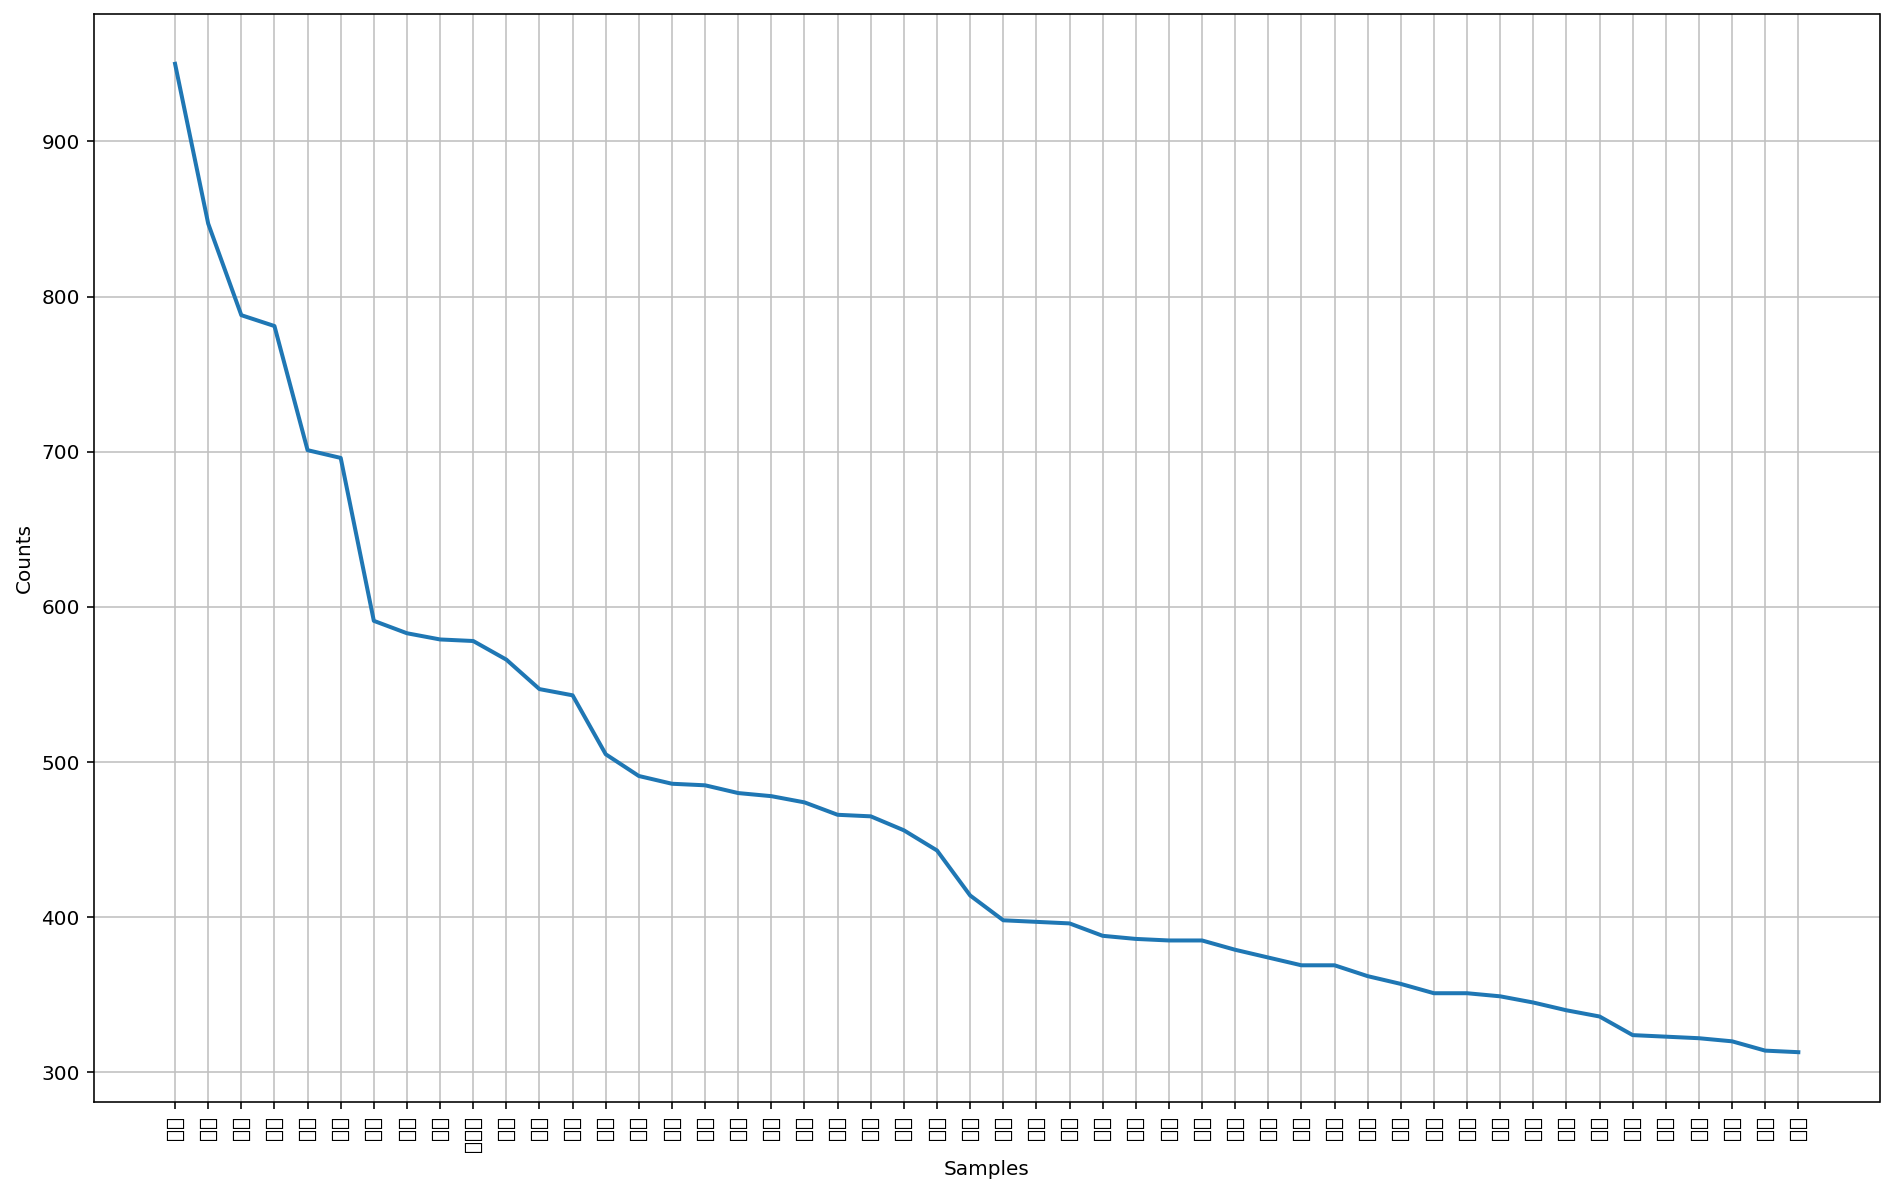

In [ ]:
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc 
%matplotlib inline

plt.figure(figsize = (16, 10))
text.plot(50)

In [ ]:
Senti = []
for line in train_data:
  Senti.append(line[1])
# 반응변수를 for문을 통해서 Senti라는 새롭게 만든 리스트에 넣어줌

In [ ]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)
# Senti의 컬럼이름을 변경해줌 

In [ ]:
labels = Senti['Label']
# labels에 Senti를 저장 
classes = sorted(labels.unique())
# classes에 Senti의 고유한 값을 저장 

In [ ]:
label_to_cat = dict()
# 빈 딕셔너리 생성 

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

# for문을 사용하여 Label을 더미변수로 변환 

label_to_cat

{1: array([1, 0, 0, 0], dtype=int8),
 2: array([0, 1, 0, 0], dtype=int8),
 3: array([0, 0, 1, 0], dtype=int8),
 4: array([0, 0, 0, 1], dtype=int8)}

In [ ]:
Senti.Label

0       1
1       1
2       1
3       1
4       1
       ..
1200    2
1201    2
1202    2
1203    2
1204    2
Name: Label, Length: 1205, dtype: int64

In [ ]:
Text = []
for line in train_data:
  Text.append(line[0])

In [ ]:
y = np.array([label_to_cat[label] for label in Senti.Label])
# 변환된 것을 for문을 사용하여 array형태로 y에 저장 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors


In [ ]:
embeddings = Word2Vec(size=200, min_count=3, window = 3, sg =1) #최소빈도 3이상/ 주변단어 포함 범위, sg가 1이면 skip-gram이고 0이면 CBOW
embeddings.build_vocab([sentence for sentence in Text])
embeddings.train([sentence for sentence in Text],
                 total_examples=embeddings.corpus_count,
                 epochs=embeddings.epochs)

(501584, 582095)

In [ ]:
embeddings.save('위험척도유형_LSTM+CNN.model')
print('완료')

완료


In [ ]:
vocab = dict(embeddings.wv.most_similar('상처'))

In [ ]:
X = embeddings[vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_

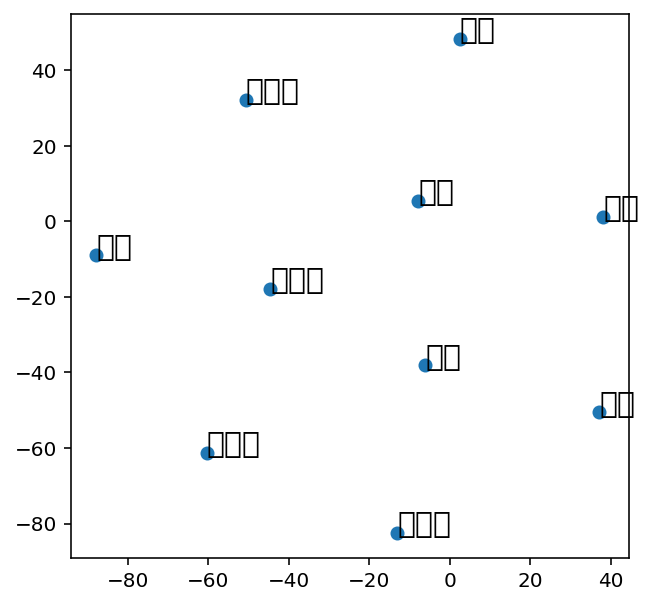

In [ ]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(5, 5)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos,fontsize=15)
    
plt.show()

In [ ]:
def encode_sentence_lstm(tokens, emb_size):
    vec = np.zeros((170, 200))
    # vec의 길이는 170이고 한 토큰의 의미를 설명하기 위한 vector가 200
    for i, word in enumerate(tokens):
        if i > 169:
            break
        try:
            vec[i] = embeddings.wv[word].reshape((1, emb_size))
        except KeyError:
            continue
    return vec

In [ ]:
v1 = np.zeros((170,200))
v1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(v1)

170

In [ ]:
for ele in map(lambda x: x, Text):
    print(ele)

['친부', '정당', '이유', '없이', '아서', '고막', '천공', '생겨', '고막', '패치', '어머니', '협의', '이혼', '생각', '신데', '미성년자', '동생', '개월', '숙려', '기간', '가져야', '한다고', '협의', '이혼', '개월', '숙려', '기간', '친부', '따로', '도록', '나요', '가정폭력', '대한', '증거', '고막', '천공', '치료', '다는', '진단서', '밖에', '신고', '접근', '금지', '처분', '내릴', '나요', '친부', '이혼', '반대', '진단', '서로', '가정', '폭력', '다는', '사실', '증명', '이혼', '소송', '나요', '향후', '미성년자', '동생', '양육권', '분쟁', '당한', '가정폭력', '근거', '친모', '양육권', '가져갈', '도록', '나요']
['중학', '가정폭력', '신고', '신고', '대로', '물건', '집어던지', '폭력', '휘두르', '저번', '그릇', '던지', '치우', '숟가락', '던지', '마음', '든다고', '숟가락', '던지', '머리채', '때렸', '계속', '때릴라', '아서', '그만', '화내', '이혼', '얘기', '나가', '불태워', '버린다', '이혼', '지금', '카드', '달라', '재산', '분할', '한다고', '얘기', '다가', '서러워서', '심하', '시끄럽', '진짜', '머리채', '쫓아낼', '뒤져', '뒤져', '계속', '반복', '이혼', '난리', '피우', '이거', '때문', '계속', '죄책감', '고요', '이혼', '학원', '다녀요', '힘들', '사과', '할라', '힘들', '보여서', '어쩔', '없이', '상황', '설명', '오해', '지내', '볼라', '당연히', '통했', '고요', '려는', '부분', '응응', '잘못', '거리', '넘기', '다가', '해도', '계속', '해명', '할라', '해도', '

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array([encode_sentence_lstm(ele, 200) for ele in map(lambda x: x, Text)])

train_text, test_text, train_senti, test_senti = train_test_split(X, y, stratify = y)

In [ ]:
train_text.shape

(903, 170, 200)

In [ ]:
len(train_text[1])

170

In [ ]:
print(len(train_text))
print(len(train_senti))
print(len(test_text))
print(len(test_senti))

903
903
302
302


In [ ]:
import keras.utils
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout,Conv1D,MaxPooling1D
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.layers import  Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
max_words = 1000
max_len = 170
Batch_size = 32
Epochs = 50

In [ ]:
train_text.shape

(903, 170, 200)

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 170, 200)]        0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 170, 128)          128128    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 85, 128)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 10880)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               1392768   
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 16)                104

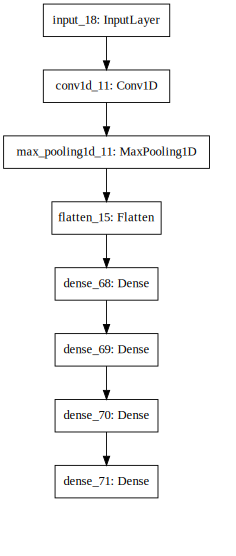

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
# create the model
input_tensor = Input(shape=(170,200))
model = Sequential()
x = Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu')(input_tensor)
x = MaxPooling1D(pool_size = 2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'sigmoid')(x)
x = Dense(16, activation = 'relu')(x)



output_tensor = Dense(4, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
29/29 [==============================] - 1s 22ms/step - loss: 1.4159 - accuracy: 0.2509 - val_loss: 1.3445 - val_accuracy: 0.3079
Epoch 2/50
29/29 [==============================] - 0s 13ms/step - loss: 1.3442 - accuracy: 0.3433 - val_loss: 1.3132 - val_accuracy: 0.3775
Epoch 3/50
29/29 [==============================] - 0s 13ms/step - loss: 1.2228 - accuracy: 0.4783 - val_loss: 1.2622 - val_accuracy: 0.4272
Epoch 4/50
29/29 [==============================] - 0s 13ms/step - loss: 1.1231 - accuracy: 0.5052 - val_loss: 1.2803 - val_accuracy: 0.4503
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 1.0199 - accuracy: 0.5938 - val_loss: 1.2366 - val_accuracy: 0.4437
Epoch 6/50
29/29 [==============================] - 0s 13ms/step - loss: 0.7985 - accuracy: 0.7339 - val_loss: 1.3178 - val_accuracy: 0.4470
Epoch 7/50
29/29 [==============================] - 0s 13ms/step - loss: 0.5842 - accuracy: 0.8425 - val_loss: 1.3965 - val_accuracy: 0.4205
Epoch 8/50
29

In [ ]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

10/10 [==============================] - 0s 6ms/step - loss: 2.2331 - accuracy: 0.4669


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 2.233067512512207
Test Accuracy: 0.4668874144554138


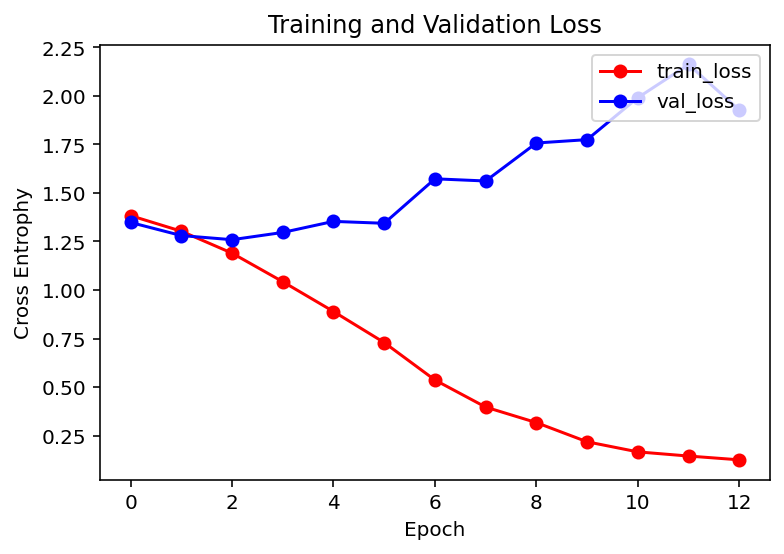

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

LSTM

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 170, 200)]        0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 400)               641600    
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               51328     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_66 (Dense)             (None, 16)                104

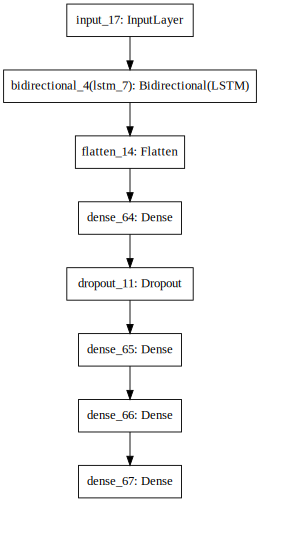

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
# create the model
input_tensor = Input(shape=(170,200))
model = Sequential()
x = Bidirectional(LSTM(200))(input_tensor) # recurrent_dropout = 0.1
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation = 'sigmoid')(x)
x = Dense(16, activation = 'relu')(x)



output_tensor = Dense(4, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
29/29 [==============================] - 7s 128ms/step - loss: 1.3912 - accuracy: 0.2506 - val_loss: 1.3630 - val_accuracy: 0.3411
Epoch 2/50
29/29 [==============================] - 3s 93ms/step - loss: 1.3674 - accuracy: 0.3307 - val_loss: 1.3694 - val_accuracy: 0.3013
Epoch 3/50
29/29 [==============================] - 3s 93ms/step - loss: 1.3409 - accuracy: 0.3620 - val_loss: 1.3264 - val_accuracy: 0.3709
Epoch 4/50
29/29 [==============================] - 3s 93ms/step - loss: 1.3113 - accuracy: 0.3609 - val_loss: 1.3239 - val_accuracy: 0.3344
Epoch 5/50
29/29 [==============================] - 3s 94ms/step - loss: 1.2878 - accuracy: 0.3917 - val_loss: 1.2908 - val_accuracy: 0.3742
Epoch 6/50
29/29 [==============================] - 3s 92ms/step - loss: 1.2855 - accuracy: 0.3941 - val_loss: 1.3446 - val_accuracy: 0.2947
Epoch 7/50
29/29 [==============================] - 3s 93ms/step - loss: 1.3476 - accuracy: 0.3289 - val_loss: 1.3206 - val_accuracy: 0.3344
Epoch 8/50
2

In [ ]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

10/10 [==============================] - 0s 27ms/step - loss: 1.1822 - accuracy: 0.5099


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 1.1822434663772583
Test Accuracy: 0.5099337697029114


LSTM + CNN

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 170, 200)]        0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 170, 128)          128128    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 85, 128)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 400)               526400    
_________________________________________________________________
dense_76 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_77 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_78 (Dense)             (None, 16)                104

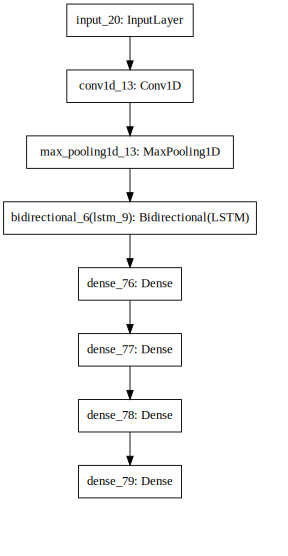

In [ ]:
# create the model
input_tensor = Input(shape=(170,200))
model = Sequential()
x = Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu')(input_tensor)
x = MaxPooling1D(pool_size = 2)(x)
x = Bidirectional(LSTM(200))(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation='relu')(x)


output_tensor = Dense(4, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()


from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
29/29 [==============================] - 6s 94ms/step - loss: 1.3846 - accuracy: 0.2573 - val_loss: 1.3719 - val_accuracy: 0.2914
Epoch 2/50
29/29 [==============================] - 2s 53ms/step - loss: 1.3243 - accuracy: 0.3210 - val_loss: 1.3485 - val_accuracy: 0.3146
Epoch 3/50
29/29 [==============================] - 2s 53ms/step - loss: 1.2972 - accuracy: 0.3634 - val_loss: 1.3179 - val_accuracy: 0.3775
Epoch 4/50
29/29 [==============================] - 2s 53ms/step - loss: 1.2288 - accuracy: 0.4258 - val_loss: 1.3103 - val_accuracy: 0.3709
Epoch 5/50
29/29 [==============================] - 2s 53ms/step - loss: 1.2158 - accuracy: 0.4408 - val_loss: 1.3361 - val_accuracy: 0.4040
Epoch 6/50
29/29 [==============================] - 2s 53ms/step - loss: 1.2156 - accuracy: 0.4357 - val_loss: 1.2392 - val_accuracy: 0.4669
Epoch 7/50
29/29 [==============================] - 2s 52ms/step - loss: 1.1737 - accuracy: 0.4833 - val_loss: 1.2251 - val_accuracy: 0.4967
Epoch 8/50
29

In [ ]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

10/10 [==============================] - 0s 17ms/step - loss: 1.1572 - accuracy: 0.5563


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 1.1572003364562988
Test Accuracy: 0.556291401386261


In [ ]:
df1 = pd.read_excel('gdrive/My Drive/pytest/실데이터.xlsx')
# 지정된 구글드라이브의 파일을 불러오기 

In [ ]:
df1

,ID,비정형,아동 점수,학대행위자 점수
0,10301032017040012,\n- 친모는 아동이 자신의 자식이지만 조금만 더 성격을 고치면 괜찮은 아동인데 그...,2,1
1,80808082017040003,"\n\n- 아동가정 방문 당시, 피해아동(000,000)은 학교 하교 후 친구 집에...",3,1
2,10201022017040041,- 사실혼관계인 남자가 아동의 친모에게 칼을 들고 위협하여 아동이 신고한 사건으로 ...,3,2
3,10301032017040012,"\n1. 신고경위\n\n- 2016년 12월 12일, 아동 동생이 친부가 아동을 때...",2,1


In [ ]:
list2 = df1.values.tolist()
train_data =[(text_tokenizing(text_cleaning(line[1])), line[2])for line in list2 if text_tokenizing(text_cleaning(line[1]))]
Text = []
for i in train_data:
  Text.append(i[0])

In [ ]:
X = np.array([encode_sentence_lstm(ele, 170) for ele in map(lambda x: x, Text)])
pred = model.predict(X)

In [ ]:
Senti = []
for i in train_data:
  Senti.append(i[1])

In [ ]:
pred

array([[3.16054397e-03, 2.92164415e-01, 4.40609008e-01, 2.64065951e-01],
       [3.26639274e-03, 9.80449378e-01, 1.62578635e-02, 2.64034352e-05],
       [2.92149815e-03, 9.82511103e-01, 1.45456381e-02, 2.16959506e-05],
       [3.46540916e-03, 9.82197523e-01, 1.40485065e-02, 2.88613373e-04]],
      dtype=float32)

In [ ]:
a = []
b = []
c = []
d = []
for i in pred:
  if i[0] >= 0.3:
    a.append(1)
  else: 
    a.append(0)
  if i[1] >= 0.3:
    b.append(1)
  else:
    b.append(0)
  if i[2] >= 0.3:
    c.append(1)
  else:
    c.append(0)
  if i[3] >= 0.3:
    d.append(1)
  else:
    d.append(0)

In [ ]:
print(len(a))
print(len(b))
print(len(c))
print(len(d))

4
4
4
4


In [ ]:
s1 = pd.Series(a, name = '1점')
s2 = pd.Series(b, name = '2점')
s3 = pd.Series(c, name = '3점')
s4 = pd.Series(d, name = '4점')

d1 = pd.concat([s1,s2,s3,s4], axis = 1)

In [ ]:
a1 = d1.sum(axis = 1)

In [ ]:
d1['sum'] = a1

In [ ]:
d1

,1점,2점,3점,4점,sum
0,0,0,1,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,0,1,0,0,1


In [ ]:
Senti

[2, 3, 3, 2]